# CIC Carpentries Workshop - Day 1 - Part 2
This lesson is adapted from the Data Carpentries [Data Analysis and Visualization in Python for Ecologists](https://datacarpentry.org/python-ecology-lesson/index.html) lesson.

---
## How to use a Jupyter Notebook
Online Resources:
- https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/index.html
- https://www.packtpub.com/books/content/getting-started-jupyter-notebook-part-1

Useful Tips:
- The notebook autosaves
- You run a cell with **shift + enter** or using the run button in the tool bar
- If you run a cell with **option + enter** it will also create a new cell below
- See *Help > Keyboard Shortcuts* or the *Cheatsheet* for more info
- The notebook has different type of cells (Code and Markdown are most commonly used): 
    - **Code** cells expect code for the Kernel you have chosen, syntax highlighting is available, comments in the code are specified with # -> code after this will not be executed
    - **Markdown** cells allow you to right report style text, using markdown for formatting the style (e.g. Headers, bold face etc)
---

## Starting with Data

### Working with Pandas DataFrames in Python
We can automate the process of performing data manipulations in Python. It's efficient to spend time building the code to perform these tasks because once it's built, we can use it over and over on different datasets that use a similar format. This makes our methods easily reproducible. We can also easily share our code with colleagues and they can replicate the same analysis.

#### Starting in the same spot
To help the lesson run smoothly, let's ensure that everyone is in the same directory. This should help us avoid path and filename issues. At this time, please navigate to the workshop directory. If you are working in Jupyter Notebook, be sure that you start your notebook in the workshop directory.

A quick aside is that there are Python libraries like [OS
Library](https://docs.python.org/3/library/os.html) and [pathlib](https://docs.python.org/3/library/pathlib.html) that can work with our
directory structure, however, that is not our focus today.

#### Our Data
For this lesson, we will be using the Portal Teaching data, a subset of the data
from Ernst et al
[Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA](http://www.esapubs.org/archive/ecol/E090/118/default.htm)

We will be using files from the [Portal Project Teaching Database](https://figshare.com/articles/Portal_Project_Teaching_Database/1314459).
This section will use the `surveys.csv` file which can be found in ../data/.

We are studying the species and weight of animals caught in plots in our study
area. The dataset is stored as a `.csv` file: each row holds information for a
single animal, and the columns represent:

| Column           | Description                        |
|------------------|------------------------------------|
| record_id        | Unique id for the observation      |
| month            | month of observation               |
| day              | day of observation                 |
| year             | year of observation                |
| plot             | ID of a particular plot            |
| species          | 2-letter code                      |
| sex              | sex of animal ("M", "F")           |
| wgt              | weight of the animal in grams      |


The first few rows of our first file look like this:

```
record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
1,7,16,1977,2,NL,M,32,
2,7,16,1977,3,NL,M,33,
3,7,16,1977,2,DM,F,37,
4,7,16,1977,7,DM,M,36,
```

#### About Libraries
![](package.png)

A library in Python contains a set of tools (called functions) that perform
tasks on our data. Importing a library is like getting a piece of lab equipment
out of a storage locker and setting it up on the bench for use in a project.
Once a library is set up, it can be used or called to perform many tasks.

You only need to load a library once during your session. You can load the library when needed
or you can load all necessary libraries at the beginning of your script. 
This is good practice, especially for the readability of your code.

#### Pandas in Python
One of the best options for working with tabular data in Python is to use the
[Python Data Analysis Library](http://pandas.pydata.org/) (a.k.a. Pandas). The
Pandas library provides data structures, produces high quality plots with
[matplotlib](http://matplotlib.org/) and integrates nicely with other libraries
that use [NumPy](http://www.numpy.org/) (which is another Python library) arrays.

Python doesn't load all of the libraries available to it by default. We have to
add an `import` statement to our code in order to use library functions. To import
a library, we use the syntax `import libraryName`. If we want to give the
library a nickname to shorten the command, we can add `as nickNameHere`.  An
example of importing the pandas library using the common nickname `pd` is below.

In [3]:
# Importing Pandas library
import pandas as pd

Each time we call a function that's in a library, we use the syntax
`LibraryName.FunctionName`. Adding the library name with a `.` before the
function name tells Python where to find the function. In the example above, we
have imported Pandas as `pd`. This means we don't have to type out `pandas` each
time we call a Pandas function.

A handy **Pandas cheatsheet** can be found [here](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

---

### Reading CSV Data using Pandas
We will begin by locating and reading our survey data which is in CSV format. We can use Pandas' `read_csv` function to pull the file directly into a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dataframe).

#### So What's a DataFrame?
A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, factors and more) in columns. It is similar to a spreadsheet or an SQL table or the `data.frame` in R. A DataFrame always has an index (0-based). An index refers to the position of an element in the data structure.

In [4]:
# Note that pd.read_csv is used because we imported pandas as pd
pd.read_csv("../data/surveys.csv")

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


We can see that there were 35,549 rows parsed. Each row has 9 columns. The first column is the index of the DataFrame. The index is used to identify the position of the data, but it is not an actual column of the DataFrame. It looks like the `read_csv` function in Pandas read our file properly. However, we haven’t saved any data to memory so we can work with it. We need to assign the DataFrame to a variable. Remember that a variable is a name for a value, such as `x`, or `data`. We can create a new object with a variable name by assigning a value to it using `=`.

Let’s call the imported survey data `surveys_df`:

In [6]:
surveys_df = pd.read_csv("../data/surveys.csv", low_memory=False)

Notice when you assign the imported DataFrame to a variable, Python does not produce any output on the screen. We can view the value of the `surveys_df` object by typing its name into the Python command prompt.

In [7]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


---

### Exploring Our Species Survey Data
Now, we can start exploring our data. First, let's check the data type of the data stored in `surveys_df` using the `type` method.

In [8]:
type(surveys_df)

pandas.core.frame.DataFrame

What kind of things does `surveys_df` contain? DataFrames conveniently has an attribute called `dtypes` which answers this by returning the data type for each column in our DataFrame.

In [9]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

All the values in a column have the same data type. 

Recalling from the previous episode about Python data types. Pandas and base Python use slightly different names for data types.

| Pandas Type | Native Python Type | Description |
|-------------|--------------------|-------------|
| object | string | The most general dtype. Will be assigned to your column if column has mixed types (numbers and strings). |
| int64  | int | Numeric characters. 64 refers to the memory allocated to hold this character. |
| float64 | float | Numeric characters with decimals. If a column contains numbers and NaNs(see below), pandas will default to float64, in case your missing value has a decimal. |
| datetime64, timedelta[ns] | N/A (but see the [datetime](http://doc.python.org/2/library/datetime.html) module in Python's standard library) | Values meant to hold time data. Look into these for time series experiments. |

For example, months have type `int64`, which is an integer. Weight and hindfoot_length have type `float64` which is a floating point value. The `object` type in species_id and sex doesn't have a very helpful name, but in this case it represents strings.

#### Useful Ways to View DataFrame Objects in Python
There are many ways to summarise and access the data stored in DataFrames, using attributes and methods provided by the DataFrame object.

Let's try out a few.

To access an attribute, use the DataFrame object name followed by the attribute `df_object.attribute`. Using the DataFrame `surveys_df` and attribute `columns`, an index of all the column names in the DataFrame can be access with `surveys_df.columns`.

In [10]:
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

Methods are called in a similar fashion using the syntax `df_object.method()`. As an example, `surveys_df.head()` gets the first few rows in the DataFrame `surveys_df` using **the `head()` method**. With a method, we can supply extra information in the parenthesis to control behaviour.

In [11]:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


#### Challenge
Using our DataFrame `surveys_df`, try out the attributes and methods to see what they return.
1. `surveys_df.shape` - take a note of the output of `shape` - what format does it return the shape of the DataFrame in?
2. `surveys_df.head(15)`
3. `surveys_df.tail()`

In [12]:
# 1
surveys_df.shape

(35549, 9)

In [13]:
# 2
surveys_df.head(15)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


---

In [14]:
# 3
surveys_df.tail()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


### Calculating Statistics from Data in a Pandas DataFrame
We've now read our data into Python. Next, let's perform some quick summary statistics to learn more about the data that we're working with. We might want to know how many animals were collected in each site, or how many of each species were caught. We can perform summary stats quickly using groups. But first, we need to figure out what we want to group by.

Let's explore our data some further:

In [15]:
# Look at the column names
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

Let's get a list of all the species. The `pd.unique` function tells us all of the unique values in the `species_id` column.

In [16]:
# Look at the unique species ids
pd.unique(surveys_df['species_id'])

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

Now that we can do this, let's create a list of unique site IDs (`plot_id`) found in the survey data. Call it `site_names`.

In [17]:
# Unique site ids list
site_names = pd.unique(surveys_df['plot_id'])

How many unique sites are there in the data?

In [18]:
# Check the length of the list
print('There are: ' + str(len(site_names)) + ' unique sites in the data')

There are: 24 unique sites in the data


In [19]:
# Single line solution
print('There are: ' + str(surveys_df['plot_id'].nunique()) + ' unique sites in the data')

There are: 24 unique sites in the data


#### Describe in Pandas
We can calculate basic statistics for all records in a single column using the Pandas `describe` function which will return descriptive stats including: mean, median, max, min, std, and count for a particular column in the data. However, it will only return summary values for columns containing numeric data.

For example, we might want to calculate the average weight of all individuals per site.

In [35]:
# Summary statistics for the entire dataframe
surveys_df.describe()

,record_id,month,day,year,plot_id,hindfoot_length,weight
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,31438.000000,32283.000000
mean,17775.000000,6.477847,15.991195,1990.475231,11.397001,29.287932,42.672428
std,10262.256696,3.396925,8.257366,7.493355,6.799406,9.564759,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,21.000000,20.000000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,32.000000,37.000000
75%,26662.000000,10.000000,23.000000,1997.000000,17.000000,36.000000,48.000000
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,70.000000,280.000000


In [20]:
# Summary statistics for the weight column
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

We can also extract one specific metric if we wish.

In [21]:
surveys_df['weight'].min()
surveys_df['weight'].max()
surveys_df['weight'].mean()
surveys_df['weight'].std()
surveys_df['weight'].count()

32283

#### Groups in Pandas
We often want to calculate summary statistics grouped by subsets or attributes within fields of our data however. For example, we want to know what the summary statistics look like split by `sex`. We can use Pandas' `.groupby` method, which creates a groupby DataFrame on which we can perform other Pandas methods.

In [22]:
# Grouping surveys_df by sex
by_sex = surveys_df.groupby('sex')

In [23]:
# Summary statistics for the new df
by_sex.describe()

record_id                                                               \
        count          mean           std  min      25%      50%       75%   
sex                                                                          
F     15690.0  18036.412046  10423.089000  3.0  8917.50  18075.5  27250.00   
M     17348.0  17754.835601  10132.203323  1.0  8969.75  17727.5  26454.25   

                month            ... hindfoot_length         weight  \
         max    count      mean  ...             75%   max    count   
sex                              ...                                  
F    35547.0  15690.0  6.587253  ...            36.0  64.0  15303.0   
M    35548.0  17348.0  6.396184  ...            36.0  58.0  16879.0   

                                                         
          mean        std  min   25%   50%   75%    max  
sex                                                      
F    42.170555  36.847958  4.0  20.0  34.0  46.0  274.0  
M    42.995379  36.184981  4.0  20.0  39.0  49.0  280.0  

[2 rows x 56 columns]

In [24]:
# Provide the mean for each numeric column by sex
by_sex.mean()

,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.587253,15.880943,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.396184,16.078799,1990.480401,11.098282,29.709578,42.995379


The `groupby` function is powerful in that it allows us to quickly generate summary stats, not just for one group, but several.

For example, we might want to calculate the average weight of individuals per plot.

In [25]:
# Calculate the average weight of all individuals per plot
surveys_df.groupby('plot_id')['weight'].mean()

plot_id
1     51.822911
2     52.251688
3     32.654386
4     47.928189
5     40.947802
6     36.738893
7     20.663009
8     47.758001
9     51.432358
10    18.541219
11    43.451757
12    49.496169
13    40.445660
14    46.277199
15    27.042578
16    24.585417
17    47.889593
18    40.005922
19    21.105166
20    48.665303
21    24.627794
22    54.146379
23    19.634146
24    43.679167
Name: weight, dtype: float64

Or, we might want to know how many males and females we have at each site.

In [26]:
# Count the number of each sex per site
surveys_df.groupby(['plot_id', 'sex'])['record_id'].count()

plot_id  sex
1        F       848
         M      1095
2        F       970
         M      1144
3        F       893
         M       840
4        F       872
         M      1030
5        F       527
         M       586
6        F       737
         M       764
7        F       335
         M       307
8        F       840
         M       983
9        F       853
         M      1004
10       F       141
         M       142
11       F       822
         M      1029
12       F      1060
         M      1200
13       F       628
         M       783
14       F       709
         M      1070
15       F       481
         M       409
16       F       222
         M       273
17       F       892
         M      1053
18       F       755
         M       626
19       F       522
         M       581
20       F       650
         M       613
21       F       611
         M       451
22       F       671
         M       673
23       F       165
         M       207
24       F       486


#### Basic Math Functions in Pandas
If we wanted to, we could perform math on an entire column of our data. For example, let's multiply all weight values by 2.

A more practical use of this might be the normalise the data according to mean, area, or some other value calculated from our data.

In [27]:
# Multiply all weight values by 2
surveys_df['weight']*2

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
35544      NaN
35545      NaN
35546     28.0
35547    102.0
35548      NaN
Name: weight, Length: 35549, dtype: float64

---

### Quick & Easy Plotting Data Using Pandas
We can plot our summary stats using Pandas too.

<AxesSubplot:xlabel='year', ylabel='weight'>

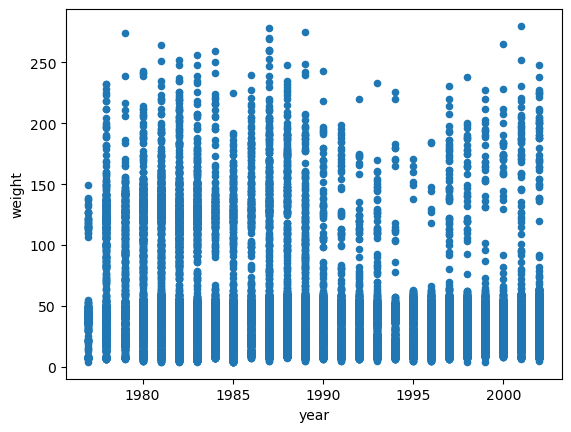

In [28]:
# Plot year vs weight
surveys_df.plot(x='year', y='weight', kind='scatter')

<AxesSubplot:xlabel='species_id'>

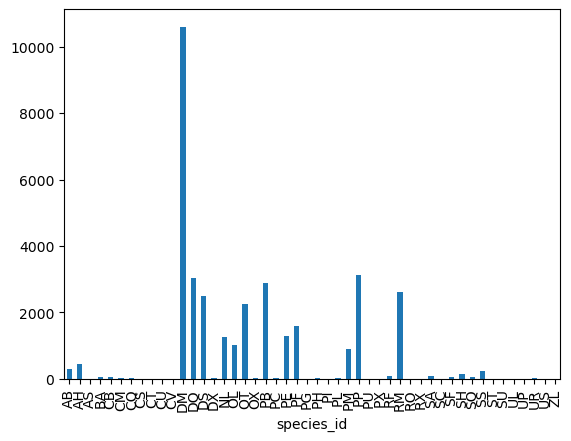

In [29]:
# Create a quick bar chart
species_count = surveys_df.groupby('species_id')['record_id'].count()

species_count.plot(kind='bar')

<AxesSubplot:xlabel='plot_id'>

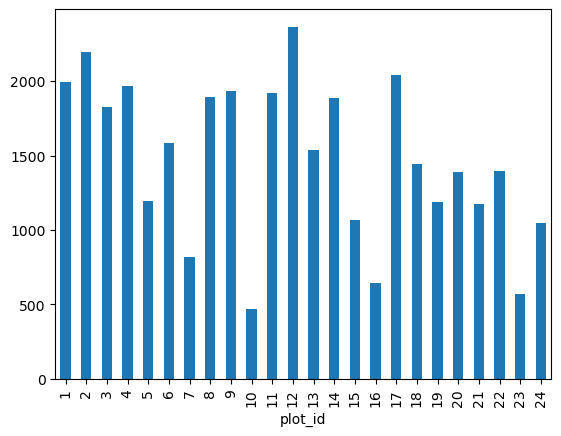

In [30]:
# We can also look at how many animals were captured in each site
total_count = surveys_df.groupby('plot_id')['record_id'].nunique()
total_count.plot(kind='bar')

#### Challenge
These challenge activities involve plotting data. It's often best to create an object to plot first, then call the .plot() method on it (see the skeleton code below with 'avrg_wgt')
1. Create a scatter plot of average weight across all species per plot.  
 - The final plots x-axis should be 'plot', and the y axis should be 'wgt'.  
 - If you use `avrg_wgt.plot()`, you will by default get a **line** plot. To turn this into a scatter plot, add the    <u>optional</u> **keyword argument** (aka "**kwarg**") `style='o'` to plot arguments:
    ```
    avrg_wgt.plot(style='o')
    ```
 - If you're missing a label, try adding the **kwarg** xlabel or ylabel to the argument of plot, separated by commas:
   ```
   avrg_wgt.plot(xlabel='your_x_label', ylabel='your_y_label')
   ```
2. Create the same plot, but with average weight for each sex per plot. Hint, you will need to `unstack` when plotting. x-axis = plot, y-axis = wgt, different lines for each sex. This is done for you in the skeleton code provided.

3. Create a trend plot of the average weight per plot over time. x-axis = year, y-axis = wgt, different lines for each plot.
 - Extra challenge question: Why do you need to unstack for q2 and a3?

<AxesSubplot:xlabel='plot_id'>

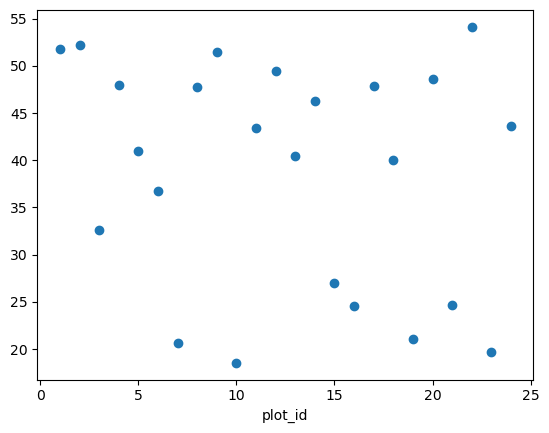

In [31]:
# Group by plot_id and calculate mean weight
avrg_wgt = surveys_df.groupby('plot_id').mean()['weight']

# Let's plot, you should see x-axis -> plot_id, y-axis -> weight
avrg_wgt.plot(style='o')

<AxesSubplot:xlabel='plot_id'>

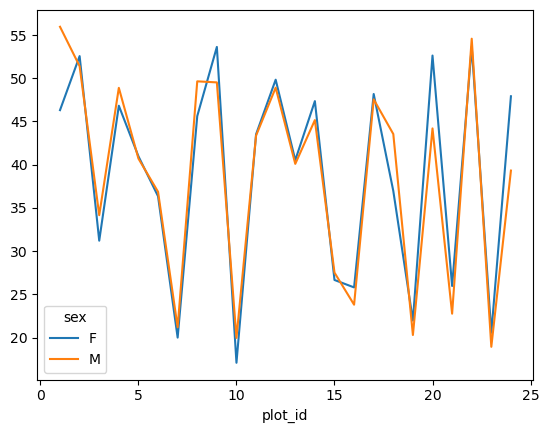

In [32]:
# Group by plot_id and sex, then calculate mean weight
avrg_wgt = surveys_df.groupby(['plot_id', 'sex']).mean()['weight']

# Let's plot, you should see x-axis -> plot_id, y-axis -> weight, different lines for sex
# You need to use the .unstack() method before the .plot() for this to work
avrg_wgt.unstack().plot()

In [33]:
avrg_wgt.unstack()

sex,F,M
plot_id,,
1,46.311138,55.950560
2,52.561845,51.391382
3,31.215349,34.163241
4,46.818824,48.888119
5,40.974806,40.708551
6,36.352288,36.867388
7,20.006135,21.194719
8,45.623011,49.641372
9,53.618469,49.519309


<AxesSubplot:xlabel='year'>

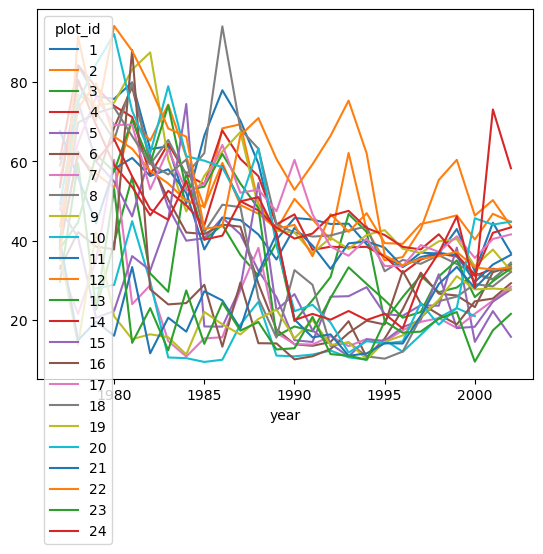

In [34]:
# Group by year and plot_id, then calculate mean weight
wgt_by_time = surveys_df.groupby(['year', 'plot_id']).mean()['weight']

# Let's plot, you should see x-axis -> year, y-axis -> weight, different lines for plot
# You need to use the .unstack() method before the .plot() for this to work
wgt_by_time.unstack().plot()